In [1]:
%run library.ipynb

In [27]:
ratio = pd.read_table(
    '../phase2/ratio/summary.txt',
    names=['pop1', 'pop2', 'chr', 'M', 'i', 'ratio']
)

ratio['rG'] = ratio.ratio * 0.8
ratio['method'] = 'ratio'

In [23]:
reml = pd.read_table(
    '../phase2/reml/summary.txt',
    names=['pop1', 'pop2', 'chr', 'M', 'N', 'i', 'rG', 'se']
)

reml['method'] = 'reml'

In [24]:
he = pd.read_table(
    '../phase2/he/summary.txt',
    names=['pop1', 'pop2', 'chr', 'M', 'N', 'i', 'rG']
)
he['method']='he'

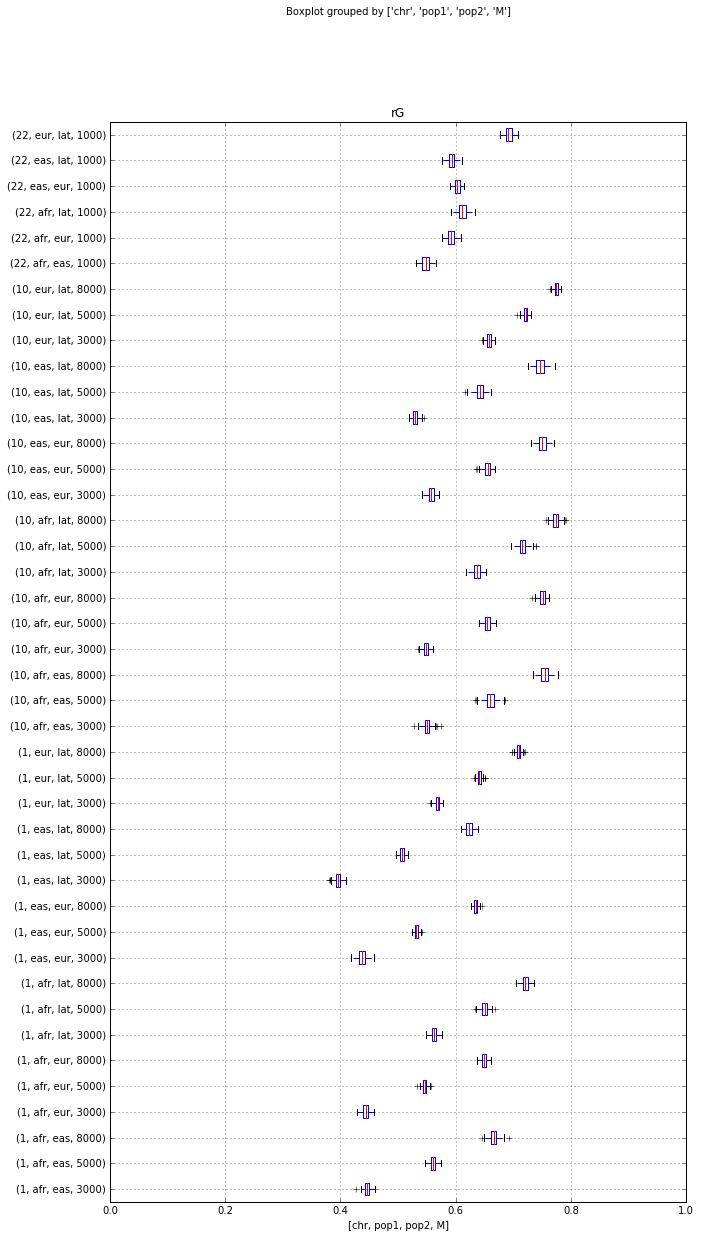

In [48]:
ax = ratio.boxplot(
    column='rG',
    by=['chr', 'pop1', 'pop2', 'M'],
    figsize=(10,20),
    vert=False,
    return_type='axes'
)
ax['rG'].set_xlim((0,1))
plt.show()

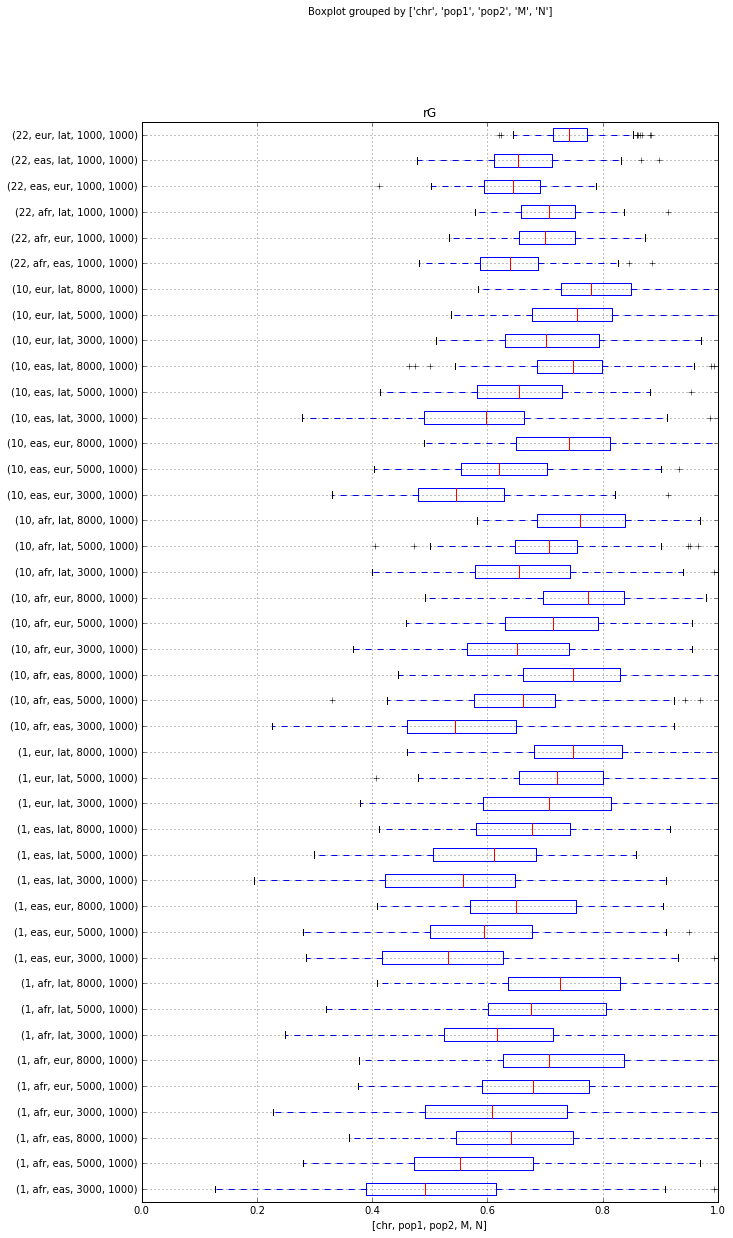

In [51]:
ax=reml.boxplot(
    column='rG',
    by=['chr', 'pop1', 'pop2', 'M', 'N'],
    figsize=(10,20),
    vert=False,
    return_type='axes'
)
ax['rG'].set_xlim((0,1))
plt.show()

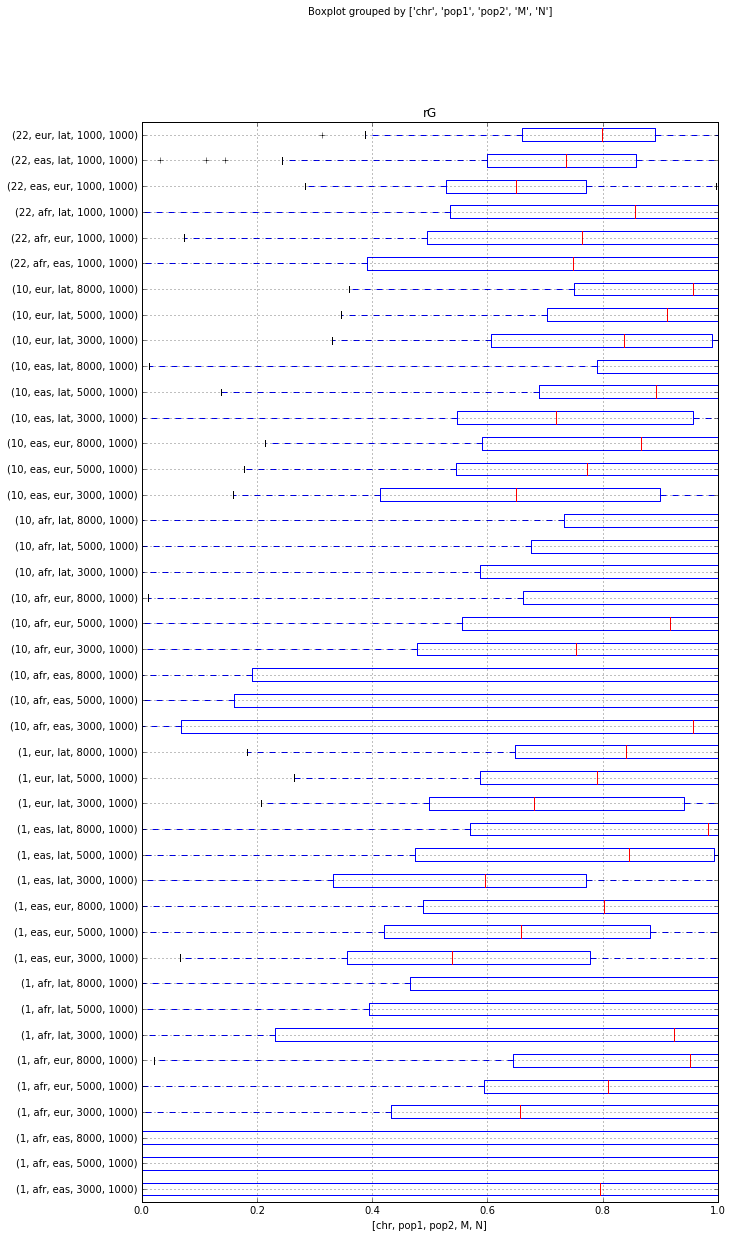

In [52]:
ax=he.boxplot(
    column='rG',
    by=['chr', 'pop1', 'pop2', 'M', 'N'],
    figsize=(10,20),
    vert=False,
    return_type='axes'
)
ax['rG'].set_xlim((0,1))
plt.show()

In [56]:
def plot_together(pop1, pop2, chrom):
    df = pd.concat(
        [
            ratio.query('pop1 == "%s" & pop2 == "%s" & chr == %d' % (pop1, pop2, chrom)),
            he.query('pop1 == "%s" & pop2 == "%s" & chr == %d' % (pop1, pop2, chrom)),
            reml.query('pop1 == "%s" & pop2 == "%s" & chr == %d' % (pop1, pop2, chrom))
        ]
    )
    df.boxplot(
        column='rG',
        by=['M', 'method'],
        vert=False,
        figsize=(15,10)
    )
    plt.show()

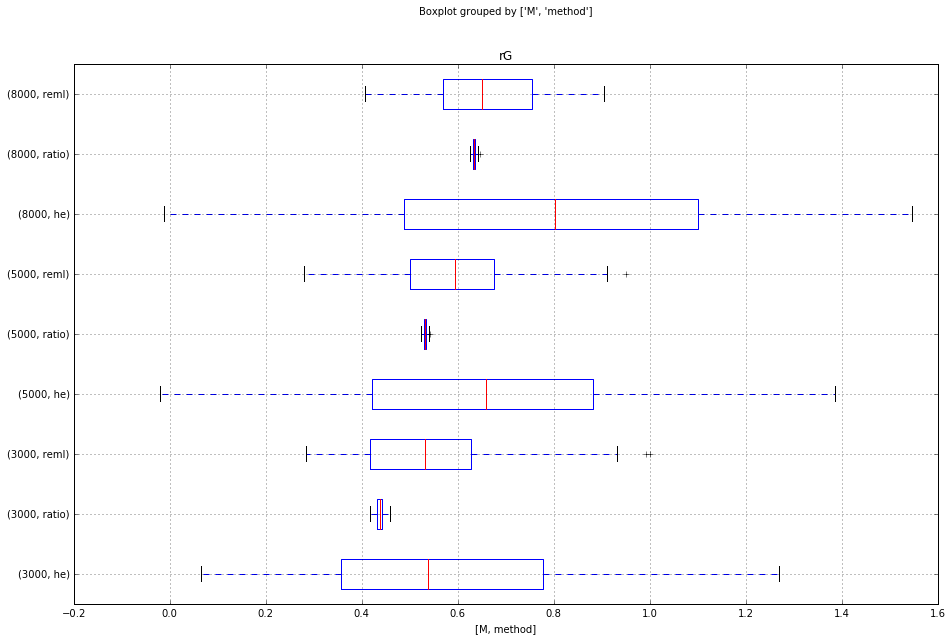

In [57]:
plot_together('eas', 'eur', 1)

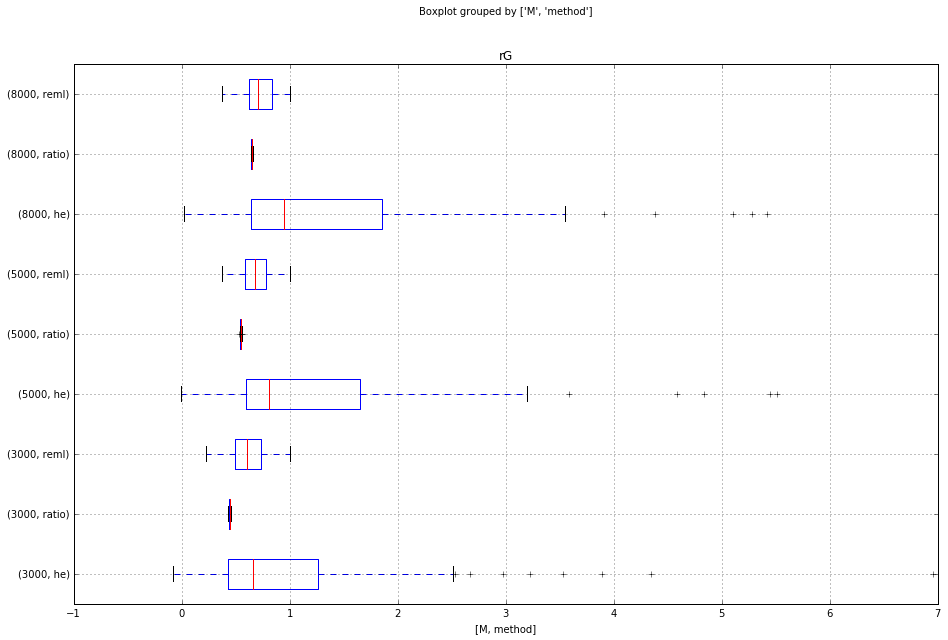

In [58]:
plot_together('afr', 'eur', 1)

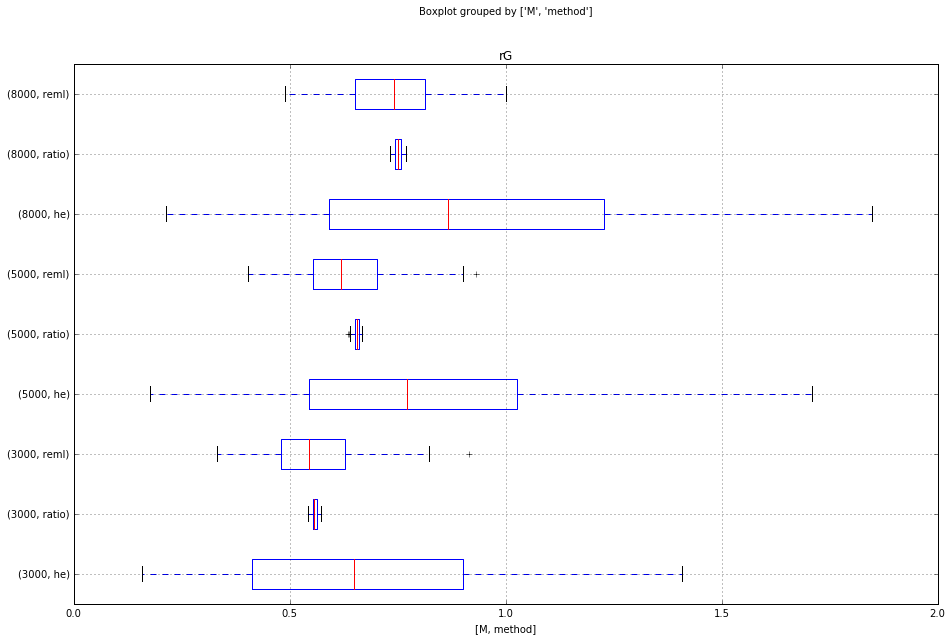

In [59]:
plot_together('eas', 'eur', 10)

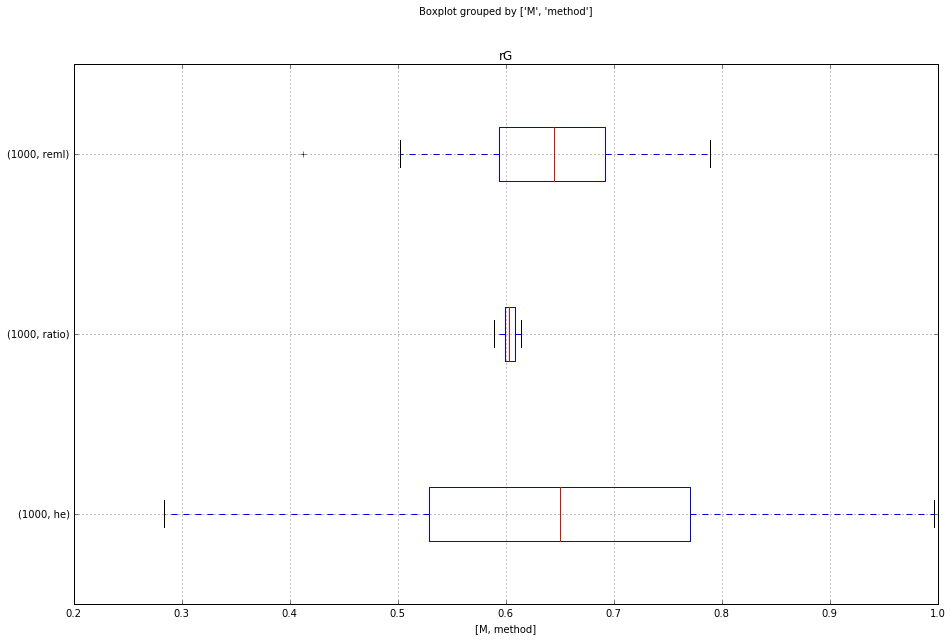

In [60]:
plot_together('eas', 'eur', 22)